In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys,os
import numpy as np
import matplotlib.pyplot as plt

##############
#For plotting
import matplotlib.cm as cm
from matplotlib.colors import LogNorm

from matplotlib import rc
from matplotlib import rcParams
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rcParams['text.usetex'] = True
rcParams['text.latex.unicode'] = True
#rcParams['text.fontsize'] = 16

work_dir = "/Users/bsafdi/Dropbox/axion_gbt_proposal/ipython"+"/../"#"/Users/bsafdi/Dropbox/axion-ns-sims/" 
plots_dir = work_dir + "local/" ##Directory for saving plots
code_dir = work_dir + "python/"
data_dir = work_dir + "data/"
sys.path.append(code_dir)

import plot_axion_info as pai

############
from scipy.interpolate import interp1d
from scipy.integrate import dblquad

#########data 
run_data_dir = work_dir + "data/"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
###########################
# Setup Plotting Defaults #
###########################
# For more options see https://matplotlib.org/users/customizing.html

# Commands for high detail plots (much larger in file size though)
#mpl.rcParams['agg.path.chunksize'] = 1000
#mpl.rcParams['savefig.dpi'] = 1000

# Line styles
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['lines.antialiased'] = True
mpl.rcParams['lines.dashed_pattern'] = 2.8, 1.5
mpl.rcParams['lines.dashdot_pattern'] = 4.8, 1.5, 0.8, 1.5
mpl.rcParams['lines.dotted_pattern'] = 1.1, 1.1
mpl.rcParams['lines.scale_dashes'] = True

# Default colors
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler('color',['cornflowerblue','forestgreen','maroon','goldenrod','firebrick','mediumorchid'])


# Fonts
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'CMU Serif'
mpl.rcParams['font.sans-serif'] = 'CMU Sans Serif, DejaVu Sans, Bitstream Vera Sans, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif'
mpl.rcParams['text.usetex'] = True

# Axes
mpl.rcParams['axes.linewidth'] = 1.0
mpl.rcParams['axes.labelsize'] = 25
mpl.rcParams['axes.labelpad'] = 9.0
                                                  
                                                  
# Tick marks - the essence of life
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.minor.size'] = 2.5
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['xtick.minor.width'] = 0.75
mpl.rcParams['xtick.major.pad'] = 8
mpl.rcParams['xtick.labelsize'] = 22
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.minor.size'] = 2.5
mpl.rcParams['ytick.major.width'] = 1.0
mpl.rcParams['ytick.minor.width'] = 0.75
mpl.rcParams['ytick.major.pad'] = 8
mpl.rcParams['ytick.labelsize'] = 22
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.minor.visible'] = True

# Legend
mpl.rcParams['legend.fontsize'] = 22
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['legend.framealpha'] = 0.8
#mpl.rcParams['legend.edgecolor'] = 'black'
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['legend.borderpad'] = 0.4 # border whitespace
mpl.rcParams['legend.labelspacing'] = 0.5 # the vertical space between the legend entries
mpl.rcParams['legend.handlelength'] = 1.5 # the length of the legend lines
mpl.rcParams['legend.handleheight'] = 0.7 # the height of the legend handle
mpl.rcParams['legend.handletextpad'] = 0.5 # the space between the legend line and legend text
mpl.rcParams['legend.borderaxespad'] = 0.5 # the border between the axes and legend edge
mpl.rcParams['legend.columnspacing'] = 2.0 # column separation


# Figure size
mpl.rcParams['figure.figsize'] = 20, 16

# Save details
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.pad_inches'] = 0.1

mpl.rcParams['xtick.labelsize'] = 30
mpl.rcParams['ytick.labelsize'] = 30

#mpl.rcParams['agg.path.chunksize'] = 1000
#mpl.rcParams['savefig.dpi'] = 1000

# Load limits

In [5]:
limit_ref = np.load(work_dir + "data/ref_limit.npy")
limit_ref_full = np.load(work_dir + "data/ref_limit_full.npy")
mass_ref = np.load(work_dir + "data/ref_masses.npy")
masses=mass_ref

# Isolated NS

In [6]:
# pai.setup_plot() #label="10-m diameter dish"
# plt.plot(masses,limit_ref,'k-',linewidth=3,label="GBT (NFW DM)")
# plt.plot(masses,lim_GBT,'k-',linewidth=3,label="GBT (NFW DM)")

# Galactic Center

In [7]:
GeV_to_GHz = 1.52e15
def calculate_flux(ang_list,flux_list,masses,D=100):
    omega = masses*1e-9*GeV_to_GHz
    f = omega/2./np.pi
    theta_radius = 6.25/60.0*(1/f)*(100.0/D)
    whs = np.where(theta_radius > np.max(ang_list))[0]
    fluxes = np.zeros(len(masses))
    if len(whs) > 0:
        fluxes[whs] = flux_list[-1]
        whs = np.where(theta_radius <= np.max(ang_list))[0]
        fluxes[whs] = interp1d(ang_list,flux_list)(theta_radius[whs])
    else:
#     print np.max(theta_radius), np.min(theta_radius), np.max(ang_list), np.min(ang_list)
        fluxes = interp1d(ang_list,flux_list)(theta_radius)
    return fluxes

In [8]:
flux_red_list_Burk_with_spike = np.load(work_dir+"data/flux_list_Burk_with_spike-2.npy")
flux_red_list_Burk_no_spike = np.load(work_dir+"data/flux_list_Burk_no_spike-2.npy")
flux_red_list_NDW_spike = np.load(work_dir+"data/flux_list_NFW_spike-2.npy")
flux_red_list_NDW_no_spike = np.load(work_dir+"data/flux_list_NFW_no_spike-2.npy")

ang_list = np.load(work_dir+"data/ang_list.npy")

In [9]:
fluxes_NFW_no_spike = calculate_flux(ang_list,flux_red_list_NDW_no_spike,masses)
fluxes_NFW_spike = calculate_flux(ang_list,flux_red_list_NDW_spike,masses)

fluxes_Burk_no_spike = calculate_flux(ang_list,flux_red_list_Burk_no_spike,masses)
fluxes_Burk_spike = calculate_flux(ang_list,flux_red_list_Burk_with_spike,masses)

In [10]:
GeV_to_GHz = 1.52e15
def SFD_GC(mass):
    omega = mass*1e-9*GeV_to_GHz
    f = omega/2./np.pi
    print f
    SEFD = 350./2*(f/2.7)**(-2.7)* (20**2 / (20**2 + 12.5**2/f**2))+10.
    #print f,SEFD
    return SEFD

def SFD_GC_rad(mass,D):
    '''
    D is diameter in m (GBT = 100 m)
    '''
    omega = mass*1e-9*GeV_to_GHz
    f = omega/2./np.pi
    theta_b = 12.5/f*(100/D)
    Gain = 2*(100/D)**-2
    SEFD = (160.*(f/1)**(-2.7)* (20**2 / (20**2 + theta_b**2))+20.)/Gain#(350.*(f/2.7)**(-2.7)* (20**2 / (20**2 + theta_b**2))+20.)/Gain
    return SEFD

In [11]:
def SEFD_func(f,d):
    SEFD_GC_like = 350./2*(f/2.7)**(-2.7)* (20**2 / (20**2 + 12.5**2/f**2))/(d/8.5)**2
    SEFD_iso = 1.19*(f)**(-2.62)/2.
    return SEFD_GC_like, SEFD_iso

In [12]:
# This is the bandwidth for NFW DM
Band_NFW = 2e-3
SFDs = SFD_GC_rad(masses,100)

In [13]:
# sensitiviy over 1 hour (S/N =5)
time = 1 #hour
S_over_N = 5
lim_GBT = (4.8e-7/Band_NFW)**(-1/4.)*limit_ref/np.sqrt(fluxes_NFW_no_spike)*np.sqrt(SFDs/2.)*(24/time)**(1/4.)*np.sqrt(S_over_N)
lim_GBT_spike = lim_GBT *np.sqrt(fluxes_NFW_no_spike / fluxes_NFW_spike)
lim_GBT_burk = lim_GBT*np.sqrt(fluxes_NFW_no_spike/fluxes_Burk_no_spike) #burk_norm_f(masses*1e-9*GeV_to_GHz/2./np.pi))#lim_GBT *np.sqrt(norm_fact / norm_fact_burk)
lim_GBT_burk_spike = lim_GBT *np.sqrt(fluxes_NFW_no_spike/fluxes_Burk_spike) #burk_norm_spike_f(masses*1e-9*GeV_to_GHz/2./np.pi))


#/ norm_fact_burk_spike)

In [22]:
def new_limit(ma):
    if ma<5e-11:
        return 3e-13
    else:
        return 1

In [28]:
np.array([new_limit(i) for i in ms])

array([3.e-13, 3.e-13, 3.e-13, 3.e-13, 3.e-13, 3.e-13, 3.e-13, 3.e-13,
       3.e-13, 3.e-13, 3.e-13, 3.e-13, 3.e-13, 3.e-13, 3.e-13, 3.e-13,
       3.e-13, 3.e-13, 3.e-13, 3.e-13, 3.e-13, 3.e-13, 3.e-13, 3.e-13,
       3.e-13, 3.e-13, 3.e-13, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00,
       1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00,
       1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00,
       1.e+00, 1.e+00])

In [29]:
ms

array([1.00000000e-13, 1.26485522e-13, 1.59985872e-13, 2.02358965e-13,
       2.55954792e-13, 3.23745754e-13, 4.09491506e-13, 5.17947468e-13,
       6.55128557e-13, 8.28642773e-13, 1.04811313e-12, 1.32571137e-12,
       1.67683294e-12, 2.12095089e-12, 2.68269580e-12, 3.39322177e-12,
       4.29193426e-12, 5.42867544e-12, 6.86648845e-12, 8.68511374e-12,
       1.09854114e-11, 1.38949549e-11, 1.75751062e-11, 2.22299648e-11,
       2.81176870e-11, 3.55648031e-11, 4.49843267e-11, 5.68986603e-11,
       7.19685673e-11, 9.10298178e-11, 1.15139540e-10, 1.45634848e-10,
       1.84206997e-10, 2.32995181e-10, 2.94705170e-10, 3.72759372e-10,
       4.71486636e-10, 5.96362332e-10, 7.54312006e-10, 9.54095476e-10,
       1.20679264e-09, 1.52641797e-09, 1.93069773e-09, 2.44205309e-09,
       3.08884360e-09, 3.90693994e-09, 4.94171336e-09, 6.25055193e-09,
       7.90604321e-09, 1.00000000e-08])

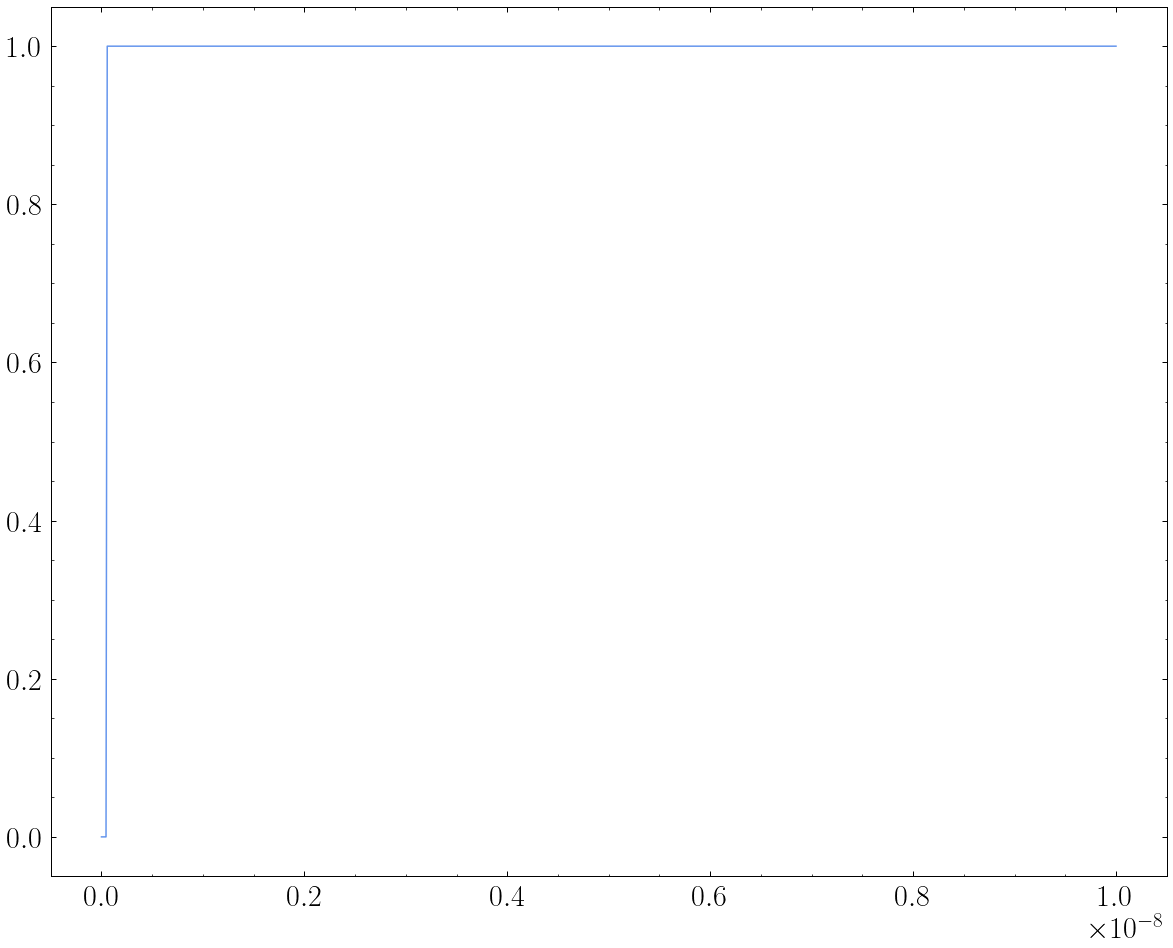

In [30]:
plt.plot(ms,np.array([new_limit(i) for i in ms]))

In [36]:
masses

array([1.00000000e-08, 1.09749877e-08, 1.20450354e-08, 1.32194115e-08,
       1.45082878e-08, 1.59228279e-08, 1.74752840e-08, 1.91791026e-08,
       2.10490414e-08, 2.31012970e-08, 2.53536449e-08, 2.78255940e-08,
       3.05385551e-08, 3.35160265e-08, 3.67837977e-08, 4.03701726e-08,
       4.43062146e-08, 4.86260158e-08, 5.33669923e-08, 5.85702082e-08,
       6.42807312e-08, 7.05480231e-08, 7.74263683e-08, 8.49753436e-08,
       9.32603347e-08, 1.02353102e-07, 1.12332403e-07, 1.23284674e-07,
       1.35304777e-07, 1.48496826e-07, 1.62975083e-07, 1.78864953e-07,
       1.96304065e-07, 2.15443469e-07, 2.36448941e-07, 2.59502421e-07,
       2.84803587e-07, 3.12571585e-07, 3.43046929e-07, 3.76493581e-07,
       4.13201240e-07, 4.53487851e-07, 4.97702356e-07, 5.46227722e-07,
       5.99484250e-07, 6.57933225e-07, 7.22080902e-07, 7.92482898e-07,
       8.69749003e-07, 9.54548457e-07, 1.04761575e-06, 1.14975700e-06,
       1.26185688e-06, 1.38488637e-06, 1.51991108e-06, 1.66810054e-06,
      

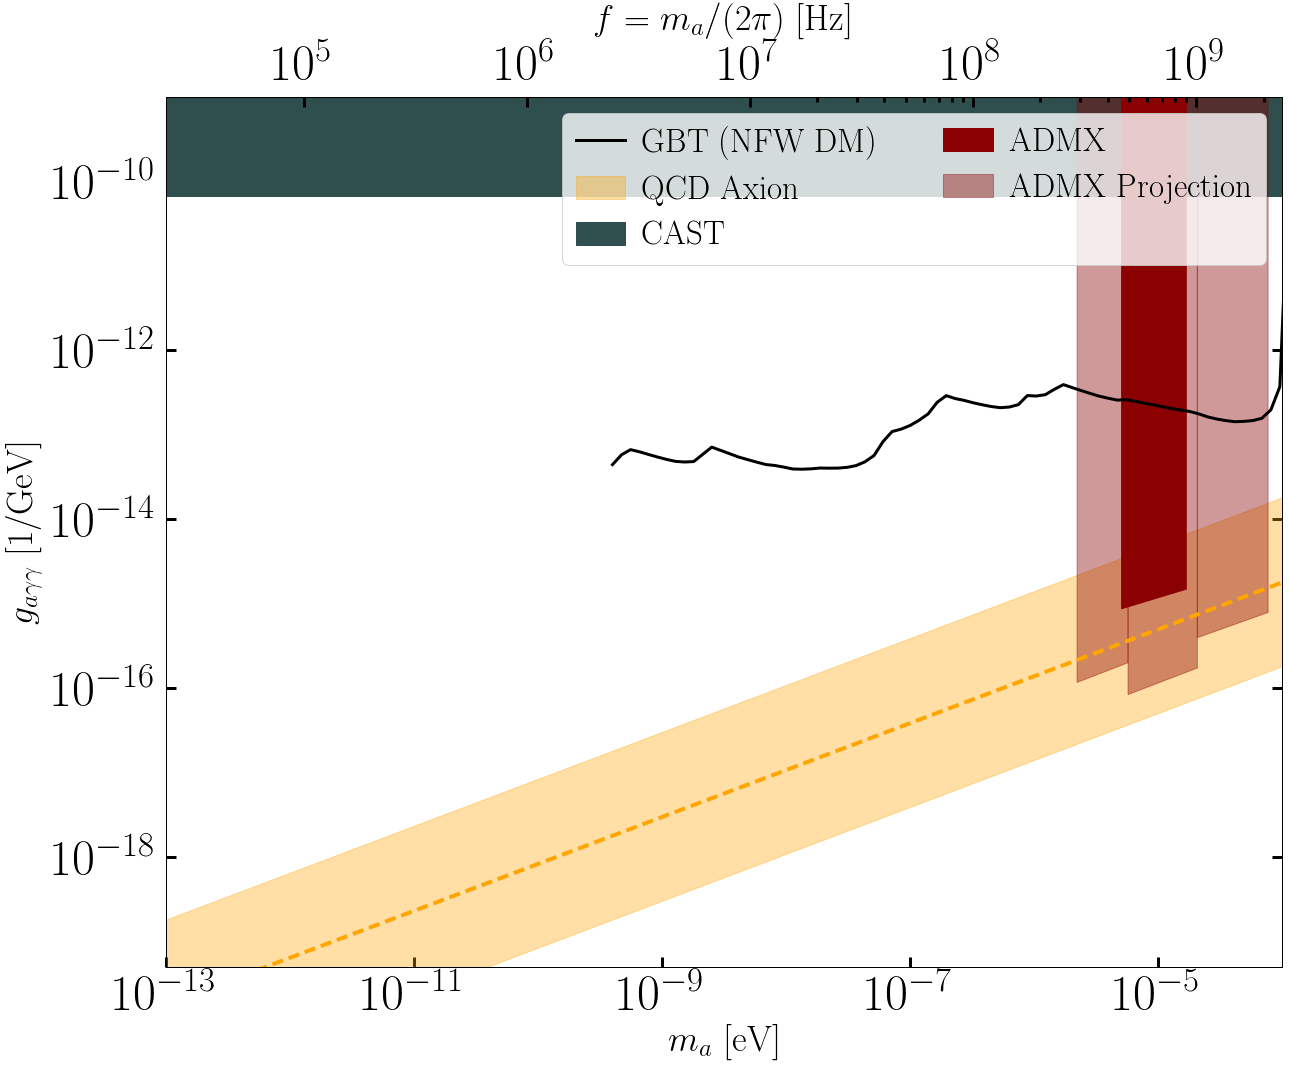

In [37]:
pai.setup_plot(xmin=1e-13) #label="10-m diameter dish"
plt.plot(masses,lim_GBT,'k-',linewidth=3,label="GBT (NFW DM)")
# #plt.plot(masses,lim_SKA,'k-.',linewidth=3,label="SKA-like (1000m)$^2$ (NFW DM)")
# plt.plot(masses,lim_GBT_spike,color="black",linestyle="dotted",linewidth=3,label=r"GBT (NFW DM, DM spike)")
# plt.plot(masses,lim_GBT_burk,'r-',linewidth=3,label="GBT (Burkert DM)")
# plt.plot(masses,lim_GBT_burk_spike,'r',linestyle="dotted",linewidth=3,label="GBT (Burkert DM, DM spike)")
ms = 10**np.linspace(-13,-3,50)

plt.plot(ms,np.array([new_limit(i) for i in ms]),'k-')
#plt.axhline(3e-12)

plt.xlim(1e-10,1e-5)
plt.legend(fontsize=33,ncol=2)
#plt.savefig(work_dir + "local/one_hour_GC_GBT.pdf",bbox_inches="tight")

# 1 Degree off GC

In [13]:
def flux_off(mass):
    omega = mass*1e-9*GeV_to_GHz
    f = omega/2./np.pi
    theta_b = 12.5/f
    return 4e4*(theta_b/10)**2

def flux_off_Burk(mass):
    omega = mass*1e-9*GeV_to_GHz
    f = omega/2./np.pi
    theta_b = 12.5/f
    return 1e3*(theta_b/10)**2


def SFD_GC_rad_off(mass,D,theta_off=60):
    '''
    D is diameter in m (GBT = 100 m)
    '''
    omega = mass*1e-9*GeV_to_GHz
    f = omega/2./np.pi
    theta_b = 12.5/f*(100/D)
    Gain = 2*(100/D)**-2
    SEFD = (350.*(f/2.7)**(-2.7)* (20**2 / (20**2 + theta_b**2))*np.exp(-theta_off**2/20.**2)+20. + 1.19*(f)**(-2.62))/Gain
    return SEFD

In [14]:
fluxes_off = flux_off(masses)
fluxes_off_Burk = flux_off_Burk(masses)
SFDs_off = SFD_GC_rad_off(masses,100)

lim_GBT_off = (4.8e-7/Band_NFW)**(-1/4.)*limit_ref_full/np.sqrt(fluxes_off)*np.sqrt(SFDs_off/2.)*(24/time)**(1/4.)*np.sqrt(S_over_N)
lim_GBT_off_Burk = (4.8e-7/Band_NFW)**(-1/4.)*limit_ref_full/np.sqrt(fluxes_off_Burk)*np.sqrt(SFDs_off/2.)*(24/time)**(1/4.)*np.sqrt(S_over_N)



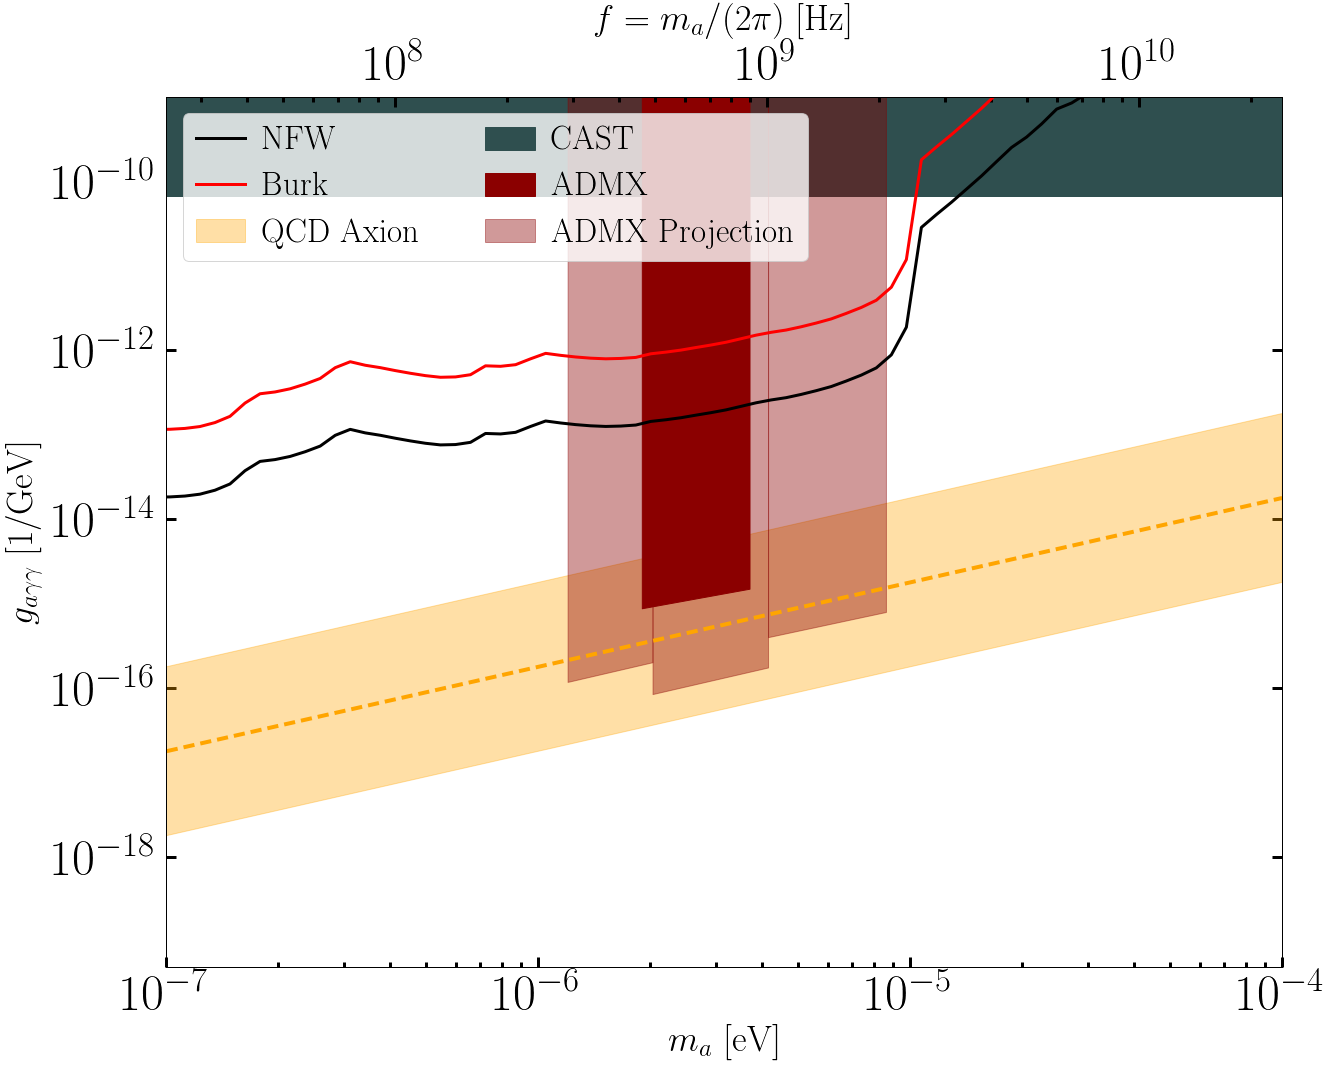

In [15]:
pai.setup_plot() #label="10-m diameter dish"
plt.plot(masses,lim_GBT_off,'k-',linewidth=3,label="NFW")
plt.plot(masses,lim_GBT_off_Burk,'r-',linewidth=3,label="Burk")
plt.legend(fontsize=33,ncol=2)
plt.savefig(work_dir + "local/one_hour_GC_off.pdf",bbox_inches="tight")

# M54

In [16]:
GeV_to_GHz = 1.52e15
def SFD_sag(mass):
    omega = mass*1e-9*GeV_to_GHz
    f = omega/2./np.pi
    #f = mass*1e-9*GeV_to_GHz
    SEFD = 10. + 1.19*(f)**(-2.62)/2.
    #print f,SEFD
    return SEFD

def SFD_sag_rad(mass,D):
    '''
    D is diameter in m (GBT = 100 m)
    '''
    omega = mass*1e-9*GeV_to_GHz
    f = omega/2./np.pi
    Gain = 2*(100/D)**-2
    SEFD = (1.19*(f)**(-2.62)+20.)/Gain
    return SEFD

SFDs_sag = SFD_sag(masses)
SFDs_sag_SKA = SFD_sag_rad(masses,1e3)

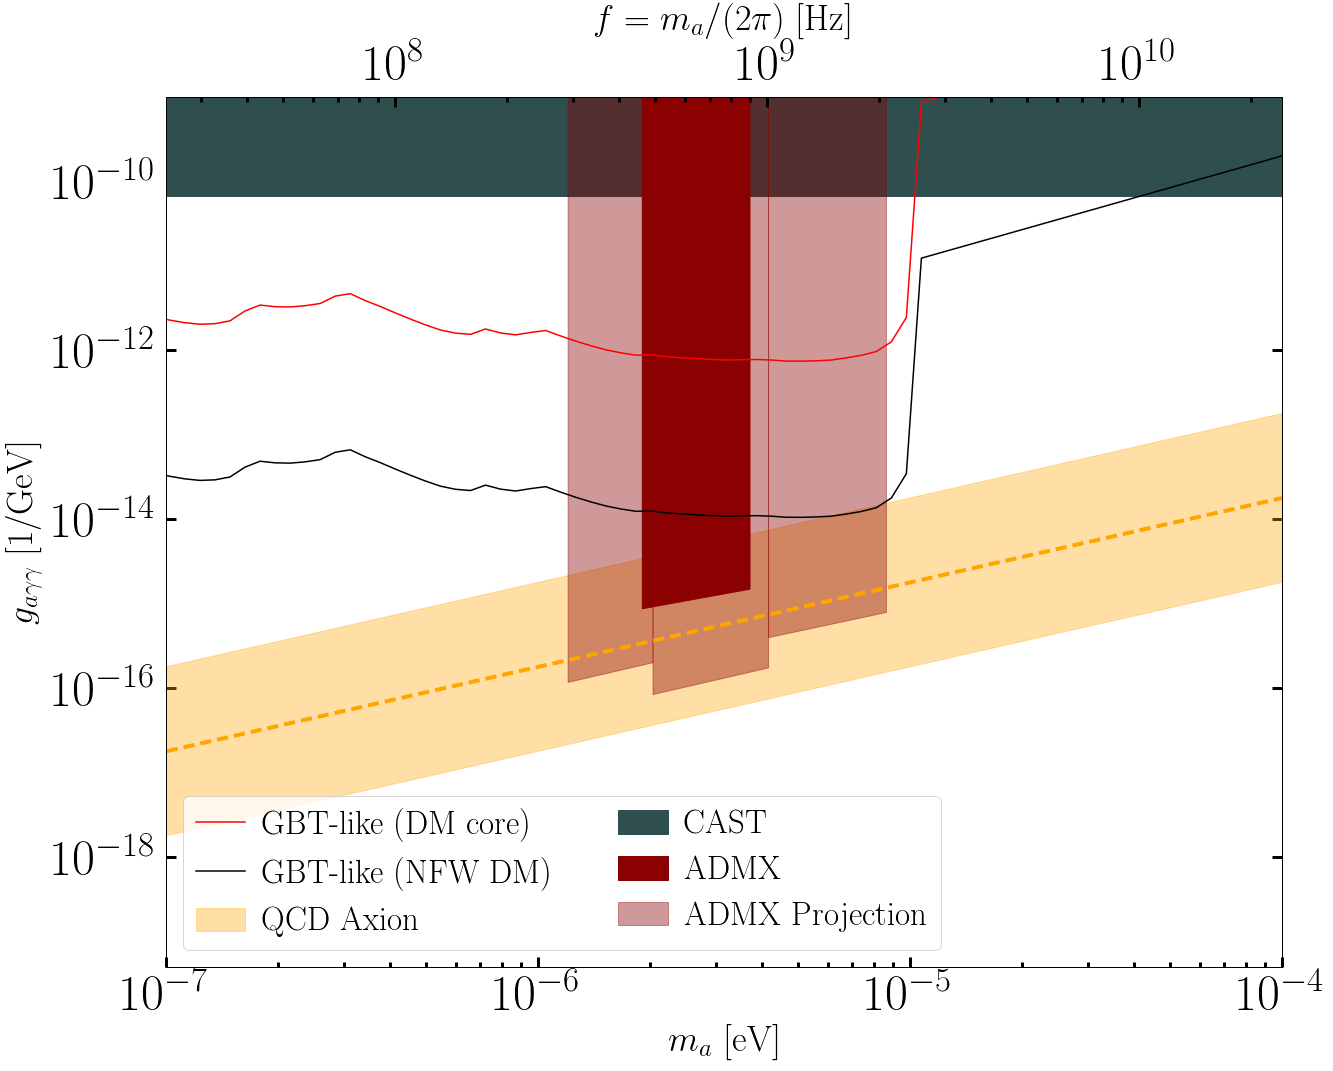

In [17]:
Band_SAG = 2*10.0/2.9e5
pai.setup_plot()
lim_core = limit_ref/np.sqrt(1.2e3)*(4.8e-7/Band_SAG)**(-1/4.)*np.sqrt(SFDs_sag/2.)*(24/time)**(1/4.)*np.sqrt(S_over_N)
lim_cusp = limit_ref/np.sqrt(6e6)*(4.8e-7/Band_SAG)**(-1/4.)*np.sqrt(SFDs_sag/2.)*(24/time)**(1/4.)*np.sqrt(S_over_N)
lim_cusp_SKA = limit_ref/np.sqrt(6e6)*(4.8e-7/Band_SAG)**(-1/4.)*np.sqrt(SFDs_sag_SKA/2.)*(24/time)**(1/4.)*np.sqrt(S_over_N)

plt.plot(masses,lim_core,'r-',label="GBT-like (DM core)")
plt.plot(masses,lim_cusp,'k-',label="GBT-like (NFW DM)")
#plt.plot(masses,lim_cusp_SKA,'k-.',label="SKA-like (NFW DM)")
#plt.fill_between(masses,lim_core,lim_cusp,hatch="X",edgecolor="grey",color="grey",label="GJ model, with non-resonant",alpha=0.5)
plt.legend(ncol=2,fontsize=33)
plt.savefig(work_dir + "local/one_hour_Sag_GBT_core_cusp.pdf",bbox_inches="tight")

# M31

In [18]:
flux_red_list_Burk_with_spike_M31 = np.load(work_dir+"data/flux_list_Burk_with_spike-M31.npy")
flux_red_list_Burk_no_spike_M31 = np.load(work_dir+"data/flux_list_Burk_no_spike-M31.npy")
flux_red_list_NDW_spike_M31 = np.load(work_dir+"data/flux_list_NFW_spike-M31.npy")
flux_red_list_NDW_no_spike_M31 = np.load(work_dir+"data/flux_list_NFW_no_spike-M31.npy")

ang_list_m31 = np.load(work_dir+"data/ang_list-m31.npy")

In [19]:
def calculate_flux(ang_list,flux_list,masses,D=100):
    omega = masses*1e-9*GeV_to_GHz
    f = omega/2./np.pi
    theta_radius = 6.25/60.0*(1/f)*(100.0/D)
    whs = np.where(theta_radius > np.max(ang_list))[0]
    fluxes = np.zeros(len(masses))
    if len(whs) > 0:
        fluxes[whs] = flux_list[-1]
        whs = np.where(theta_radius <= np.max(ang_list))[0]
        fluxes[whs] = interp1d(ang_list,flux_list)(theta_radius[whs])
    else:
#     print np.max(theta_radius), np.min(theta_radius), np.max(ang_list), np.min(ang_list)
        fluxes = interp1d(ang_list,flux_list)(theta_radius)
    return fluxes

In [20]:
fluxes_NFW_no_spike_M31 = calculate_flux(ang_list_m31,flux_red_list_NDW_no_spike_M31,masses)
fluxes_NFW_spike_M31 = calculate_flux(ang_list_m31,flux_red_list_NDW_spike_M31,masses)

fluxes_Burk_no_spike_M31 = calculate_flux(ang_list_m31,flux_red_list_Burk_no_spike_M31,masses)
fluxes_Burk_spike_M31 = calculate_flux(ang_list_m31,flux_red_list_Burk_with_spike_M31,masses)

In [21]:
#fluxes_NFW_spike_M31

In [22]:
# fluxes_NFW_no_spike = calculate_flux(ang_list_m31,flux_red_list_NDW_no_spike,masses)
# fluxes_NFW_spike = calculate_flux(ang_list_m31,flux_red_list_NDW_spike,masses)

# fluxes_Burk_no_spike = calculate_flux(ang_list_m31,flux_red_list_Burk_no_spike,masses)
# fluxes_Burk_spike = calculate_flux(ang_list_m31,flux_red_list_Burk_with_spike,masses)

In [23]:
Band_M31 = (160/2.9e5)

In [24]:
SFDs_IG = SFD_sag_rad(masses,100.0)#SFD_IG_rad(masses,100.0)

In [25]:
lim_GBT_M31 = (4.8e-7/Band_M31)**(-1/4.)*limit_ref/np.sqrt(fluxes_NFW_no_spike_M31)*np.sqrt(SFDs_IG/2.)*(24/time)**(1/4.)*np.sqrt(S_over_N)
lim_GBT_spike_M31 = (4.8e-7/Band_M31)**(-1/4.)*limit_ref/np.sqrt(fluxes_NFW_spike_M31)*np.sqrt(SFDs_IG/2.)*(24/time)**(1/4.)*np.sqrt(S_over_N)
lim_GBT_burk_M31 = (4.8e-7/Band_M31)**(-1/4.)*limit_ref/np.sqrt(fluxes_Burk_no_spike_M31)*np.sqrt(SFDs_IG/2.)*(24/time)**(1/4.)*np.sqrt(S_over_N)
lim_GBT_burk_spike_M31 = (4.8e-7/Band_M31)**(-1/4.)*limit_ref/np.sqrt(fluxes_Burk_spike_M31)*np.sqrt(SFDs_IG/2.)*(24/time)**(1/4.)*np.sqrt(S_over_N)

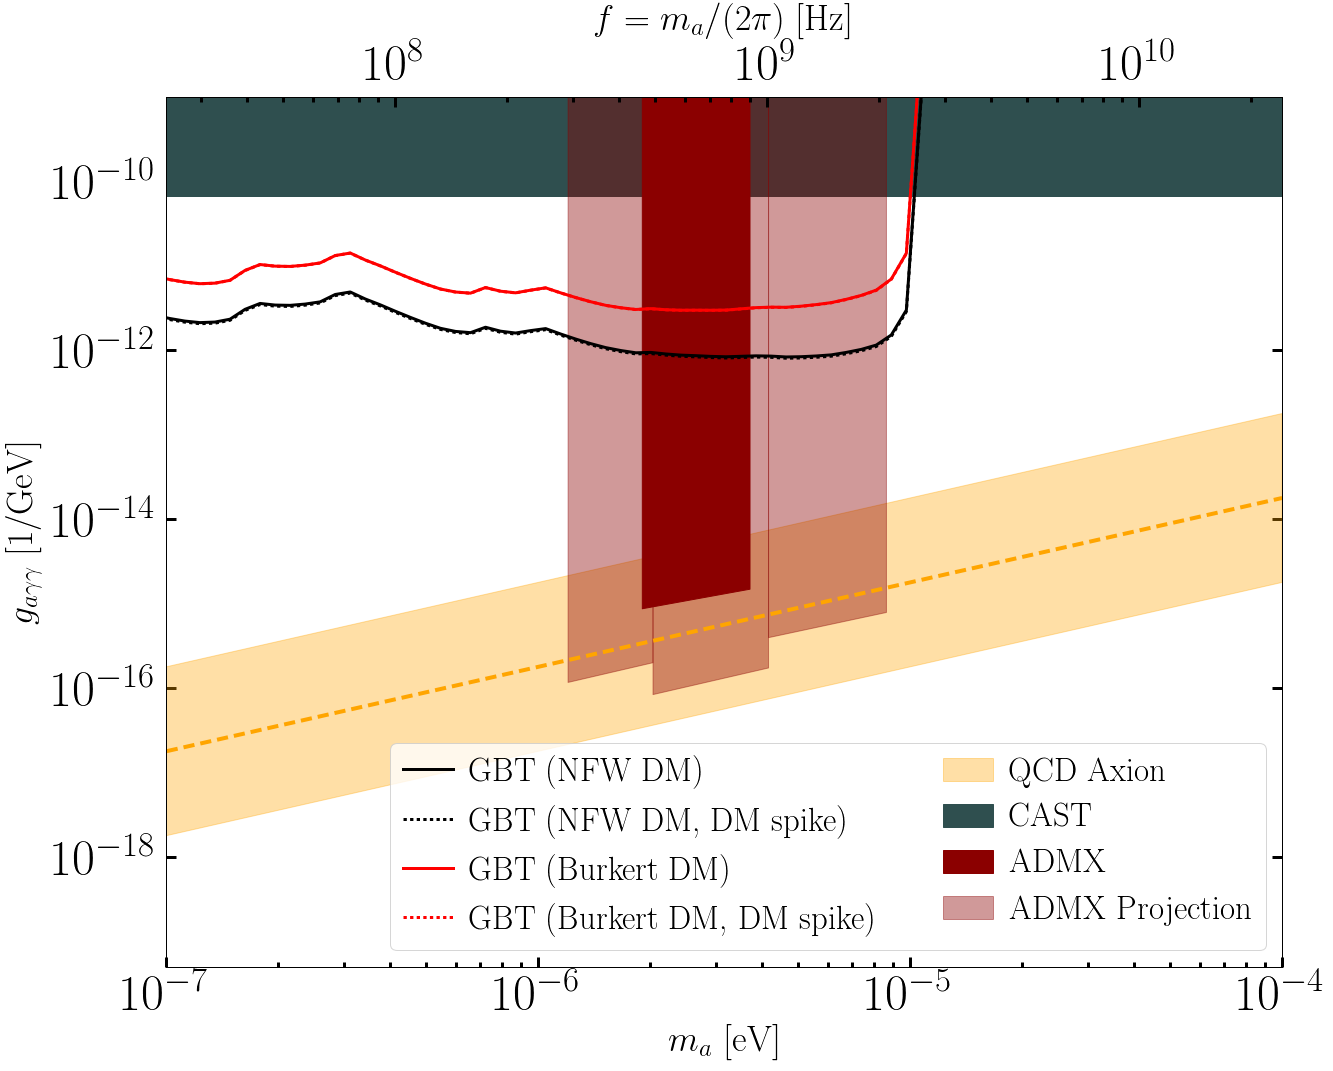

In [26]:
pai.setup_plot() #label="10-m diameter dish"
plt.plot(masses,lim_GBT_M31,'k-',linewidth=3,label="GBT (NFW DM)")
#plt.plot(masses,lim_SKA,'k-.',linewidth=3,label="SKA-like (1000m)$^2$ (NFW DM)")
plt.plot(masses,lim_GBT_spike_M31,color="black",linestyle="dotted",linewidth=3,label=r"GBT (NFW DM, DM spike)")
plt.plot(masses,lim_GBT_burk_M31,'r-',linewidth=3,label="GBT (Burkert DM)")
plt.plot(masses,lim_GBT_burk_spike_M31,'r',linestyle="dotted",linewidth=3,label="GBT (Burkert DM, DM spike)")
plt.legend(fontsize=33,ncol=2)
plt.savefig(work_dir + "local/one_hour_M31_GBT.pdf",bbox_inches="tight")

In [27]:
# pai.setup_plot()
# plt.plot(masses,(4.8e-7/Band_M31)**(-1/4.)*limit_ref/np.sqrt(fluxes_NFW_spike)*np.sqrt(SFDs_IG/2.)*(24/time)**(1/4.)*np.sqrt(S_over_N),'k-',linewidth=3,label="GJ model, with non-resonant")
# plt.plot(masses,(4.8e-7/Band_M31)**(-1/4.)*limit_ref/np.sqrt(fluxes_NFW_no_spike)*np.sqrt(SFDs_IG/2.)*(24/time)**(1/4.)*np.sqrt(S_over_N),'k-',linewidth=3,label="GJ model, with non-resonant")

# plt.plot(masses,(4.8e-7/Band_M31)**(-1/4.)*limit_ref/np.sqrt(fluxes_Burk_spike)*np.sqrt(SFDs_IG/2.)*(24/time)**(1/4.)*np.sqrt(S_over_N),'k-',linewidth=3,label="GJ model, with non-resonant")
# plt.plot(masses,(4.8e-7/Band_M31)**(-1/4.)*limit_ref/np.sqrt(fluxes_Burk_no_spike)*np.sqrt(SFDs_IG/2.)*(24/time)**(1/4.)*np.sqrt(S_over_N),'k-',linewidth=3,label="GJ model, with non-resonant")

# # plt.plot(masses,limit_ref/np.sqrt(4*6e4)*np.sqrt(SFDs_sag/2.)*(24/24.)**(1/4.)*np.sqrt(5.0),'k-',linewidth=3,label="GJ model, with non-resonant (GBT)")
# # plt.plot(masses,limit_ref/np.sqrt(4*6e4)*np.sqrt(SFDs_sag/2.)*(24/24.)**(1/4.)*np.sqrt(5.0)*np.sqrt(25.0/1000.0),'k--',linewidth=3,label="GJ model, with non-resonant (SKA)")
# plt.savefig(work_dir + "local/one_hour_M31_GBT.pdf",bbox_inches="tight")

# X-ray dim INS

In [28]:
# default is 250 pc

In [29]:
lim_ISN = limit_ref*np.sqrt(SFDs_IG/2.)*(24/time)**(1/4.)*np.sqrt(S_over_N)

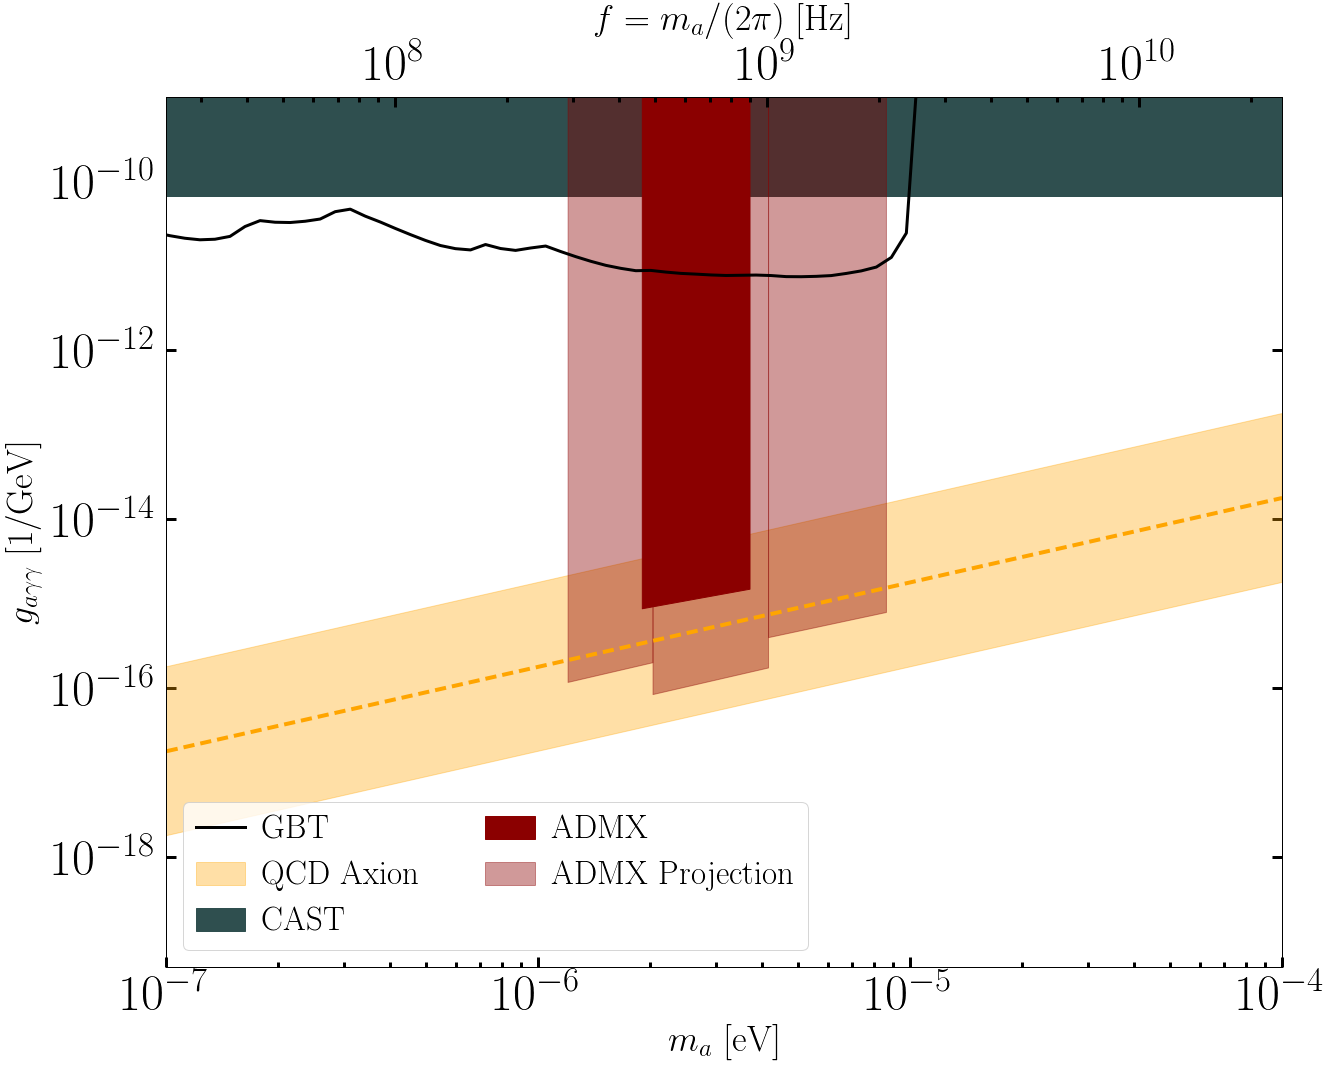

In [30]:
pai.setup_plot() #label="10-m diameter dish"
plt.plot(masses,lim_ISN,'k-',linewidth=3,label="GBT")
plt.legend(fontsize=33,ncol=2)
plt.savefig(work_dir + "local/one_hour_INS.pdf",bbox_inches="tight")

# Plot Everything Together

In [31]:
omegas = masses*1e-9*GeV_to_GHz
fs = omegas/2./np.pi

wheres_L_band = np.where( ( (fs > 1.15 ) & (fs < 1.73) ))[0]
masses[wheres_L_band]

array([5.09413801e-06, 5.59081018e-06, 6.13590727e-06, 6.73415066e-06])

In [56]:
# pai.plot_axion_info()
# plt.xscale('log')
# plt.yscale('log')
# plt.xlim(5e-6,7e-6)
# plt.ylim(1e-16,1e-10)

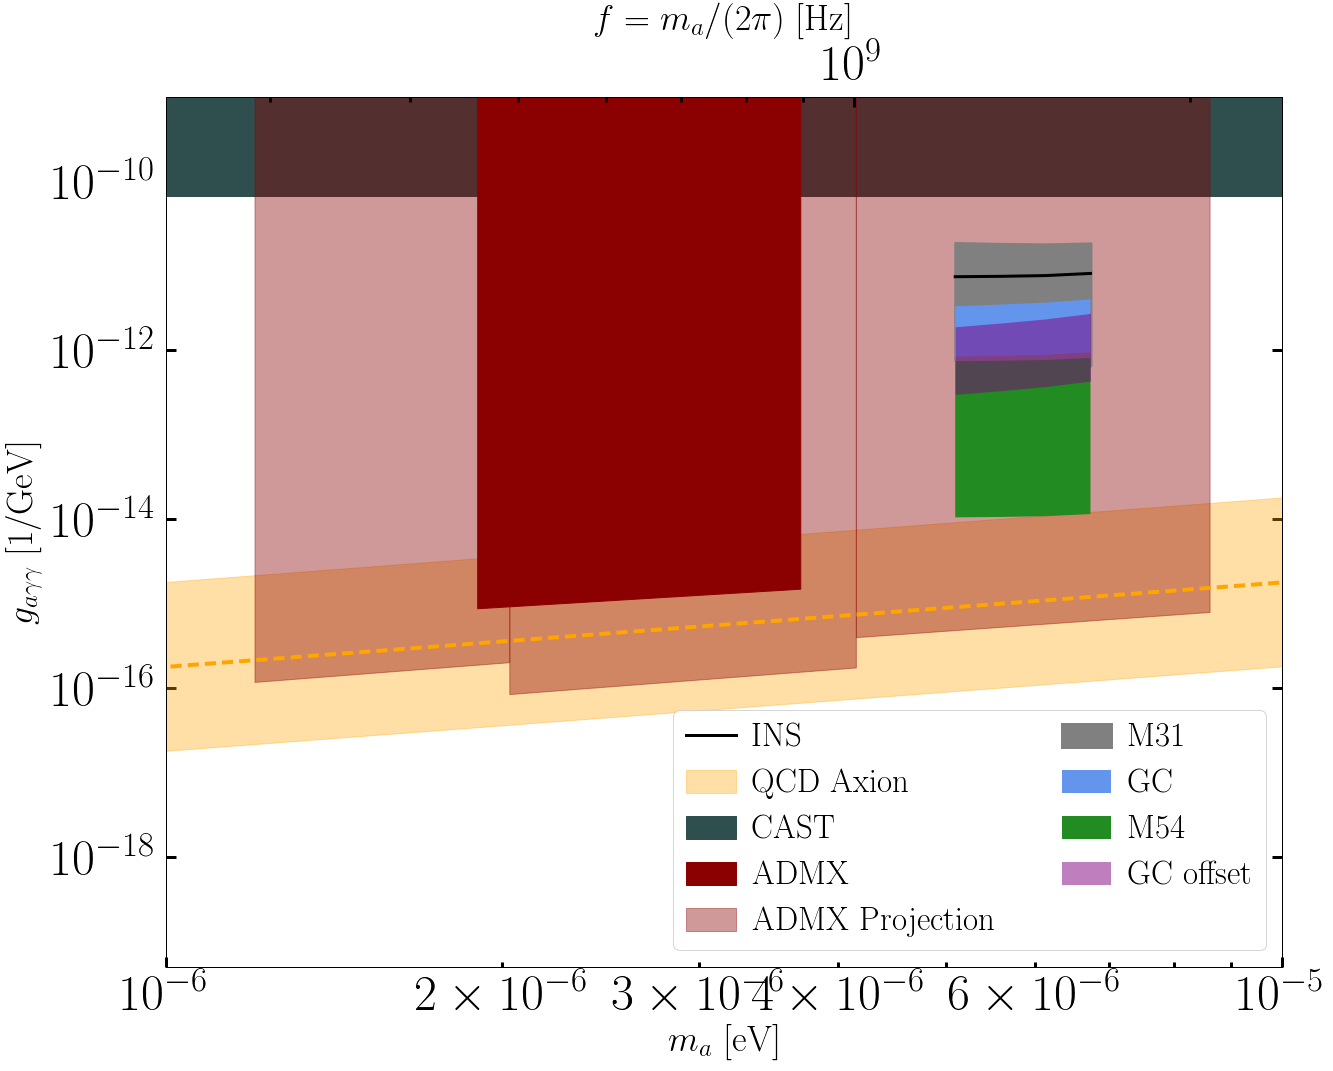

In [131]:
pai.setup_plot(xmin=1e-6,xmax=1e-5)
plt.plot(masses[wheres_L_band],lim_ISN[wheres_L_band],'k-',linewidth=3,label="INS")
#plt.plot(masses[wheres_L_band],lim_GBT_off[wheres_L_band],'k--',linewidth=3,label="GC off")
plt.fill_between(masses[wheres_L_band],lim_GBT[wheres_L_band],lim_GBT_burk[wheres_L_band],color="grey",linewidth=3,label="M31")
plt.fill_between(masses[wheres_L_band],lim_GBT_M31[wheres_L_band],lim_GBT_burk_M31[wheres_L_band],linewidth=3,label="GC")
plt.fill_between(masses[wheres_L_band],lim_core[wheres_L_band],lim_cusp[wheres_L_band],linewidth=3,label="M54")
plt.fill_between(masses[wheres_L_band],lim_GBT_off[wheres_L_band],lim_GBT_off_Burk[wheres_L_band],color="purple",alpha=0.5,linewidth=0.0,label="GC offset")
#plt.xticks(fontsize=500)

plt.legend(fontsize=33,ncol=2,loc=4)
plt.savefig(work_dir + "local/all_together.pdf",bbox_inches="tight")
#pai.xlim([5e-6,7e-6])

# Calculate fluxes

In [124]:
def noise_default(masses):
    omega = masses*1e-9*GeV_to_GHz
    f = omega/2./np.pi
    Band = f*5e-7
    Sback = 2/np.sqrt(2*60*24*60*Band*1e9)
    return f, Band,Sback

def return_flux(masses,lim,g=1e-11,new_band=1e-3):
    f,Band, S_back = noise_default(masses)
    flux = S_back*(g/lim)**2*(1e-6/new_band)
    return f, flux

In [71]:
# flux_red_list_NDW_no_spike_M31 = np.load(work_dir+"data/flux_list_NFW_no_spike-M31.npy")
# flux_red_list_NDW_no_spike = np.load(work_dir+"data/flux_list_NFW_no_spike-2.npy")
# ang_list_m31 = np.load(work_dir+"data/ang_list-m31.npy")

# fluxes_NFW_no_spike = calculate_flux(ang_list,flux_red_list_NDW_no_spike,masses)
# fluxes_NFW_no_spike_M31 = calculate_flux(ang_list_m31,flux_red_list_NDW_no_spike_M31,masses)


In [123]:
Band_NFW = 2e-3
lim_GC = limit_ref_full/np.sqrt(fluxes_NFW_no_spike)
lim_M31 = limit_ref_full/np.sqrt(fluxes_NFW_no_spike_M31)

lim_GC_Burk = limit_ref_full/np.sqrt(fluxes_Burk_no_spike)
lim_M31_Burk = limit_ref_full/np.sqrt(fluxes_Burk_no_spike_M31)

lim_INS = limit_ref_full
lim_M54 = limit_ref_full/np.sqrt(6e6)
lim_M54_low = limit_ref_full/np.sqrt(1.2e3)

In [73]:
#lim_GC

In [74]:
f,flux = return_flux(masses,lim_GC,new_band=Band_NFW)

f_M31,flux_M31 = return_flux(masses,lim_M31,new_band=Band_NFW)
f_INS,flux_INS = return_flux(masses,lim_INS,new_band=1e-6)
f_M54,flux_M54 = return_flux(masses,lim_M54,new_band=2*10/3e5)

In [76]:
print flux[np.where( ( (f>1) & (f<2) ) )[0]]
print flux_M31[np.where( ( (f>1) & (f<2) ) )[0]]
print flux_INS[np.where( ( (f>1) & (f<2) ) )[0]]
print flux_M54[np.where( ( (f>1) & (f<2) ) )[0]]

[17.05871999 16.23649341 14.69223564 12.95237316 11.21208654  9.0325562
  7.14090746  5.28362365]
[0.06263777 0.06194076 0.05775046 0.05260556 0.04701857 0.03907863
 0.0315378  0.02371173]
[0.04563562 0.04564307 0.04339797 0.04032489 0.03671335 0.03104032
 0.0256985  0.01986948]
[4107.20623604 4107.8765966  3905.8175549  3629.23999391 3304.20177359
 2793.62904096 2312.86473613 1788.25313631]


In [78]:
def return_S(f):
    return 6.7e-5*(100/250.)**2*(1/(f*2*np.pi))*1e2*(2.5e13/1e14)**(2/3.)*(11/1.)**(4/3.)*(f*2*np.pi)**(5/3.)

In [79]:
return_S(1/2./np.pi), return_S(1.)

(0.010407466892541236, 0.03543765291614647)

In [80]:
#noise_default(masses)